#Projet: Vie et mort d'une population, processus de Yule #

Binôme : Xiaozhen WANG et Qinpei DU

Ce projet décrit l'évolution d'une population où chaque individu vit un temps aléatoire distribué suivant une loi exponentielle de paramètre $\lambda$ (indépendamment des autre individus), et meurt en donnant naissance à deux individus. Donc on note que $Y_t$ le d'individus présents à l'instant $t$ et le processus $(Y_t)_{t\geq0}$ est appelé processus de Yule de paramètre $\lambda$. 

En utilisant les cinq propriétés liées au processus de Yule données dans la boîte à outil, ce projet simule certains petits événements de probabilité en utilisant des méthodes telles que le changement de probabilité, la sélection et la mutation, en utilisant ce que nous avons appris dans le cours de modalité de ce semestre et le TP.

Puis, on a appliqué la théorie des processus de Yule à un espace unidimensionnel et bidimensionnel, en simulant la naissance et le développement de prédateurs et de proies, ce qui on a permis de mieux comprendre des théories telles que le processus de Poisson et la marche aléatoire.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import pandas as pd

## 1) Première partie ##

### Question 1
Simuler les valeurs de $\mathbb{P}(Y_t>A)$ et de $\mathbb{P}(Y_t<A)$, en particulier dans le régime des événement rares. Comparer les différents méthodes utilisées.

Par le propriété, on peut faire la simulation de $Y_t$ qui suit une loi géométrique de paramètre $e^{-\lambda t}$étant donné les valeurs de $\lambda$ et $t$, i.e. $\mathbb{P}[Y_t = k] = e^{-\lambda t}(1-e^{-\lambda t})^{k-1}$ pour $k \geq 1$

Donc, on sait que l'espérance de $Y_t$ est $$\mathbb{E}[Y_t]=e^{\lambda t}$$
et la fonction de répartition $$\mathbb{P}[Y_t>k]=(1-e^{-\lambda t})^k$$
et $$F(k) = \mathbb{P}[Y_t \leq k]=1-(1-e^{-\lambda t})^k$$

#### La probabilité théorique
Tout d'abord, on va déterminer la valeur initiale, par exemple, $\lambda = 1.2, t = 6$, et $N = 10^5$. Pour calculer la valeur de $\mathbb{P}[Y_t>A]$ et $\mathbb{P}[Y_t<A]$

In [ ]:
lam = 1.2
t = 6
N = int(1e5)

mean = np.exp(lam * t)
print("L'éspérance de Y_t est " + str(mean) )

# le limit de rare événement
A_1 = mean*10
A_2 = 2
p = np.exp(- lam * t)
print('lambda = ' + str(lam))
print("t = " + str(t))

## Probabilité théorique 
# La probabilité de Y_t＞k est P(Y_t＞k) = (1-np.exp(-lam*t))**k

print('Probabilité théorique: \n')
proba_a1 = 1 - sps.geom.cdf(A_1,p)
proba_a2 = sps.geom.cdf(A_2-1,p)

print('La probabilité de Y_t > '+ str(A_1) +' est p = ' + str(proba_a1) +"\n")
print('La probabilité de Y_t < '+ str(A_2) +' est p = ' + str(proba_a2) +"\n")

L'éspérance de Y_t est 1339.4307643944169
lambda = 1.2
t = 6
Probabilité théorique: 

La probabilité de Y_t > 13394.307643944168 est p = 4.5241080663060984e-05

La probabilité de Y_t < 2 est p = 0.0007465858083766799



#### Simulation par la suite de v.a. exponentielle

Pour leprocessus de Yule, il peut être utile de construire partant d'un individu comme suit. Soit la suite ${E_i}$ suivante la loi exponentielle de paramètre $\lambda i$ pour tout $i \geq 1$. Donc le processus $(Y_t)_{t\geq0}$ défini par 

$$  Y_t = 1+ \inf \{k\geq0: E_1+E_2+...+E_k \geq t\}$$
Donc on peut faire la simulation par cette méthode.

In [ ]:
def processus(t,N):
    list = []
    for i in range(N):
        sum = 0
        k = 1
        while sum < t:
            sum += np.random.exponential(1./(k*lam), size = 1)
            k = k+1
        list.append(k+1)
    return list

In [ ]:
# Simulation de processus de Yule de lambda
N = int(2.e4)
mean_exp_1 = np.mean(np.array(processus(t,N)) > A_1)
print('La probabilité de Y_t > '+ str(A_1) +' est p = ' + str(mean_exp_1) +"\n")

La probabilité de Y_t > 13394.307643944168 est p = 0.0



#### Monte Carlo naïf
On utilise la méthode de Monte Carlo naïve. On prend la condition que $Y_t > A_1$ et $Y_t < A_2$, puis on calcule l'espérance.

In [ ]:
## Monte Carlo Naif
print('Estimateur Monte Carlo Naif')
Yt = np.random.geometric(p,size = N)
mean_mcn_a1 = np.mean(Yt > A_1)
mean_mcn_a2 = np.mean(Yt < A_2)
print("la probabilité  que Yt > " + str(A_1) +" estimée est " + str(mean_mcn_a1))
print("la probabilité  que Yt < " + str(A_2) +" estimée est " + str(mean_mcn_a2))

Estimateur Monte Carlo Naif
la probabilité  que Yt > 13394.307643944168 estimée est 4e-05
la probabilité  que Yt < 2 estimée est 0.00062


On obtient ici un résultat inexact. Pour l'algorithme de Monte Carlo, on fait une approximation des probabilités en utilisant l'approche de la loi des grands nombres, on ne peut donc obtenir le nombre de conditions satisfaites dans $10^5$ échantillons, le résultat est une forme qui est un nombre entier fois $10^{-5}$.

#### Changement de probabilité

Puis, on va utiliser la méthode de changement de probabilité:
Par l'outil de (C), à cause de la rareté de événement, on a vu que la méthode de Monte Carlos naif ne marche bien et on va utiliser la méthode de changement de probabilité. Par l'outil de (C), on sait que pour toute fonction positive $g$, on a
$$\mathbb{E}_{\mathbb{P}}[g(Y_t)] = \mathbb{E}_{\mathbb{Q}}[g(Y_t(C+1) - C)] e^{\lambda Ct - F(Y_t(C+1)-C-1)}$$
où $F(n) = \sum_{i=1} ^{n} ln(\frac {i+C} {i} ) $. Ici，évidemment la fonction $g(Y_t) = {1}_{Y_t>A_1}$

On va bien déterminer l'entier C : pour la probabilité de ${\mathbb{P}[Y_t(C+1) - C > A ]}$, cette partie ne peut pas être très petite, donc quand $C = O(A e^{-\lambda t})$, on obtient
$${\mathbb{E}[Y_t(C+1) - C] = (C+1)\mathbb{E}[Y_t] - C = (C+1) e^{\lambda t}- C } = O(A) $$.

Ensuite, on crée les fonctions $F(n)$ et $L_t$.

In [ ]:
# la fonction de F(n)
def F(n,C):    
    return np.sum(np.log(np.arange(C+1,C+n+1)/np.arange(1,n+1))) 

# La fonction de Lt
def L(t,lam,C,Yt):
    return np.exp(F(Yt-1,C)-lam*C*t)


In [ ]:
## Changement de probabilité
N = int(1e4)

A_1 = mean*10
p = np.exp(-lam*t)
C = A_1*p

# on cree deux arrays pour stocker les valeur de g(Yt)/Lt
E = []   

Yt = np.random.geometric(p,size = N*int(C+1))
Yt = np.sum(Yt.reshape(N,int(C+1)),axis=1)

for yt in Yt:
    g1 = yt - C > A_1
    E.append(g1/L(t,lam,C,yt-C-1) )

mean_cp_1 = np.mean(E)
print('La probabilité théorique de Y_t> est p = ', sps.geom.sf(A_1,p) )
print('La probabilité de Y_t > '+ str(A_1) +' est p = ' + str(mean_cp_1) +"\n")

La probabilité théorique de Y_t> est p =  4.524108066304606e-05
La probabilité de Y_t > 13394.307643944168 est p = 4.0060269434118746e-05



La performance est bonne et approche.

#### Sélection et mutation

Après la méthode de changement de probabilité, quand on bien choisit le $c$, on sait que cette méthode convient seulement aux événements comme $\mathbb{P}(Y_t>A)$ et ne peut pas utiliser pour le calcul de $\mathbb{P}(Y_t<A)$. Donc, comme le TP5, on stimule $\mathbb{P}(Y_t<A)$ par la méthode de sélection et mutation, dans laquelle on choisit la fonction de sélection en favorisant les trajectoires avec petite valeur, i.e, $G_p(X_{0:p})=e^{-\lambda X_p}$. 

Et comme $Y_t$ est à temps continu, on divise $[0,t]$ de manière géométrique, c'est-à-dire que l'on définit $X_p$ comme $Y_{(1-2^{-p})t}$ pour correspondre à $Y_t$ croissement exponentiel. 

In [ ]:
A_2 = 2
N = int(1e4)

print("Lorsque A_2=%d, lambda=%.1f, t=%d :"%(A_2,lam,t))

step = 20

T = np.power(2.,-np.arange(1,step+1))*t
X = np.transpose(np.array([[1]*N,sps.geom.rvs(np.exp(-lam*T[0]), size=N)]))
la = -A_2/(step*1000)
eta = 1

for p in range(1,step):

    G=np.exp((X[:,1]-X[:,0])*la)
    I=np.random.choice(np.arange(0,N),size=N,p=G/np.sum(G))
    eta*=np.mean(G)
    X[:,0]=X[I,1]
    X[:,1]=sps.nbinom.rvs(X[:,0],np.exp(-lam*T[p]),size=N)+X[:,0]
    
f_1=np.mean((X[:,1]<A_2)/np.exp(la*X[:,0]))

print("La probabilité theorique de Y_t<A est : ", sps.geom.cdf(A_2,np.exp(-lam*t)))
print("La probabiltié stimulée de Y_t<A est : ", f_1*eta)

Lorsque A_2=2, lambda=1.2, t=6 :
La probabilité theorique de Y_t<A est :  0.0014926142263840903
La probabiltié stimulée de Y_t<A est :  0.0002648485001858197


La performance est pas mal: lorsque $\lambda = 1.2, t = 6,A_2 = 3$ et $N = 10^4$, en comparant avec la valeur théorique de $\mathbb{P}[Y_t \leq 2] = 1.4926\times 10^{-3}$, on obtient le résultat $\mathbb{P}[Y_t \leq 2] = 1.6035\times 10^{-3}$

## Question 2 
Illustrer la convergence du point (D) par des simulations. Étudier par des simulations l'influence de la valeur terminale $\epsilon$ sur la loi de $Y_t$, en particulier dans le régime des événements rares.

#### La convergence de $\epsilon$

On peut commencer la convergence par la theorie
$$\mathbb{P}[Y_t \leq k] = e^{-\lambda t} \sum _{i=1} ^{k} (1-e^{-\lambda t})^{i-1} = 1 - (1-e^{- \lambda t})^k$$

Donc pour la probabilité de $Y_t \cdot e^{-\lambda t} = \epsilon$, on calcule

$$\mathbb{P}[\epsilon \leq m] = \mathbb{P}[Y_t \leq m \cdot e^{\lambda t}] = 1 - (1-e^{- \lambda t})^{m \cdot e^{\lambda t}}$$

Soit $x = (1-e^{- \lambda t})^{m \cdot e^{\lambda t}}$, utilisant La logarithme, on a $\ln x = m \cdot e^{\lambda t} \cdot \ln(1-e^{\lambda t})$. 

Lorsque t tend vers $+\infty$ et $\lambda$ fixé, on sait que $e^{\lambda t}\rightarrow 0$, donc $\ln(1-e^{\lambda t}) \approx -e^{\lambda t} $. Ici on a $\ln x = -m$, i.e. $x = -e^{m}$.

Donc on obtient la probabilité derépartition, 

$$F[\epsilon = m] = \mathbb{P}[\epsilon \leq m] = 1-e^{-m} $$

On se trouve que $\epsilon$ suit une loi exponentielle de paramètre 1.

Ensuite, on faite la simulation par le code.


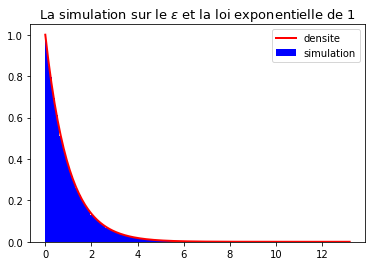

In [ ]:
N = int(1e6)
# la loi de exponentielle 1
p = np.exp(-lam*t)
Yt = np.random.geometric(p,size = N)
Eps = Yt * np.exp(-lam*t)

# la densitte de exponentielle 1
x = np.linspace(0., np.max(Eps), 200)
f_x = np.exp(-x)
plt.plot(x, f_x, color="r", label="densite", linewidth=2.0)


n_colonnes = 2 * int(len(Eps)** (1./3))
plt.hist(Eps, density=True, bins=n_colonnes, color="b", label="simulation")
plt.title("La simulation sur le $\epsilon$ et la loi exponentielle de 1", fontsize=13)
plt.legend()
plt.show()


Ici, On a obtenu le résultat de convergence. 

#### L'influence de $\epsilon$ dans différents values terminales

On choisit différents paramètres $\epsilon$. Puisque $\epsilon = 1$ est la valeur moyenne, on trouve des valeurs appropriées pour les côtés gauche et droit de 1, comme $0,1$ et $10$, respectivement, afin d'obtenir trois courbes pour la comparaison. Dans la simulation du processus Yule, on va utiliser la méthode de boîte à outil (E): pour simuler un processus de Yule ayant une valeur terminale fixée, soit $\epsilon $ une variable aléatoire exponentielle de paramètre 1 et soit $(P_t)_{t\geq 0}$ un processus de Poisson indépendant homogène de paramètre 1, on a le processus de Yule $Y_t$ défini par $Y_t = 1+ P_{\epsilon (e^{\lambda t}-1)}$ qui est paramètre $\lambda$ et valeur terminale $\epsilon$. Donc comme TP4, on peut obtenir les courbe de nombre de YUle avec les différents $\epsilon$.

Ensuite, on va fixer les différents $\epsilon$ et voir les processus de Yule dans différents values terminales.

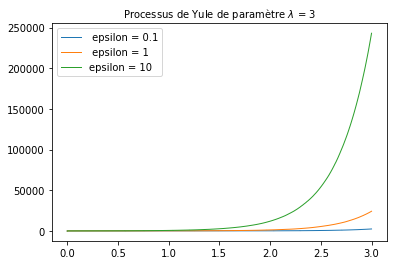

In [ ]:
# Les différents Epsilon
Eps1 = 0.1
Eps2 = 1
Eps3 = 10
# on choisit les paramètres de lambda et t
lam = 3
t = 3
# le temps de processus de Poisson
T1 = Eps1 * (np.exp(lam*t) - 1)
T2 = Eps2 * (np.exp(lam*t) - 1)
T3 = Eps3 * (np.exp(lam*t) - 1)

# Cas de epsilon = 1 et simulation jusqu'a T1
N1 = np.random.poisson(T1 * lam) +1
E_1 = T1 * np.random.rand(N1+1)
E_1[0] = 0
E_1.sort()
E_1 = np.append(E_1, T1)
t_1 = np.log((E_1/Eps1)+1) * (1/lam)

x_1 = np.arange(N1+1)
x_1 = np.append(x_1,N1)
plt.step(t_1, x_1, label=" epsilon = 0.1", linewidth=1.0)

# Cas de epsilon = 3 et simulation jusqu'a T2
N2 = np.random.poisson(T2 * lam) +1
E_2 = T2 * np.random.rand(N2+1)
E_2[0] = 0
E_2.sort()
E_2 = np.append(E_2, T2)
t_2 = np.log((E_2/Eps2)+1) * (1/lam)

x_2 = np.arange(N2+1)
x_2 = np.append(x_2,N2)
plt.step(t_2, x_2, label= " epsilon = 1", linewidth=1.0)

# Cas de epsilon = 10 et simulation jusqu'a T3
N3 = np.random.poisson(T3 * lam) +1
E_3 = T3 * np.random.rand(N3+1)
E_3[0] = 0
E_3.sort()
E_3 = np.append(E_3, T3)
t_3 = np.log((E_3/Eps3)+1) * (1/lam)

x_3 = np.arange(N3+1)
x_3 = np.append(x_3,N3)
plt.step(t_3, x_3, label="epsilon = 10", linewidth=1.0)

plt.title("Processus de Yule de paramètre $\lambda$ = "+ str(lam), fontsize=10)
plt.ylabel('le nombre')
plt.xlabel('Le temps t')
plt.legend()
plt.show()


Par le graph de résultat, quand $\epsilon$ est plus grande, le processus de Yule va atteindre le nombre plus grand.

Maintenant on refait l'initialisation, on va rechercher l'effet de changement $\lambda$, par le deux images suivantes, on voir que quand $\lambda$ est plus grand, le nombre est plus grand. Après LE changement de $\lambda$ , on va rechercher l'effet de changement $t]$. Aussi par le deux images suivantes, on voir que quand le temps $t$ est plus grand, le nombre est plus grand. Cette partie est expliqué par les images contraste dans le rapport par changement de paramètre.

## 2)Deuxième partie 
###Question 3 
  
#### Simulation de $p(\lambda)$
Tracer numériquement le graphe de $\lambda \mapsto p(\lambda)$ pour $\lambda > 1$, et étudier numériquement si la fonction $p$ est dérivable à droite en 1. Lorsque $\lambda > 1$, on pourra admettre qu'on peut approximer l'événement < les proies ne disparaissent pas > par l'événement < il y a au moins $k$ proies à un moment donné > quitte à faire une erreur de $\frac{\lambda -1}{\lambda^{k+1} - 1}$ sur $p(\lambda)$.

Soit $S_n$ le nombre de proies après $n$ naissances. On peut montrer que ($S_n: n \geq 0$) est une marche aléatoire.
Soit encore $X_1$ et $X_2$ suivent respectivement une loi exponentielle de paramètre $\lambda$ et $1$.

Si $S_{n+1} - S_n$ = 1, c'est-à-dire que une proie donne naissance à une nouvelle proie avant que un prédateur donne naissance à un nouvel prédateur. Dans ce cas, $$\mathbb{P}[S_{n+1} - S_n = 1] = \mathbb{P}[X_2 > X_1] = \iint_{x_2 > x_1} \lambda e^{- \lambda x - y} dxdy = \frac {\lambda}{1+\lambda}  $$

Dans le cas contraire, $$\mathbb{P}[S_{n+1} - S_n = -1] = \mathbb{P}[X_2 < X_1] = \frac {1}{1+\lambda}  $$



D'abord on calcule la probabilité théorique que les proies survivent. Ici, on suppose que la situation de disparition est l'événement A. Donc par la formule bayesienne, 
$$\mathbb{P}(A) = \mathbb{P}(A|S_1=0)\cdot\mathbb{P}(S_1=0)+\mathbb{P}(A|S_1=2)\cdot\mathbb{P}(S_1=2) = \frac{1}{1+\lambda}+ \mathbb{P}(A)^2 \cdot \frac{\lambda}{1+\lambda}  $$

Par cela, on obtient que $\mathbb{P}(A) = \frac{1}{\lambda}$ (on néglige la solution $\mathbb{P}(A) =1$) et donc la probabilité théorique lorsque $ \lambda \geq 1$ est

$$p(\lambda) = 1-\mathbb{P}(A) =1- \frac{1}{\lambda}$$

Maintenant on veut simuler $p(\lambda)$, la probabilité que les proies survivent toujours. Sachant que si elles s'éteignent, elles disparaissent rapidement, notons $\tau$ le premier temps où $(S_n:n\geq 0)$ atteint la valeur $k$ ou $0$. Alors on peut utiliser la valeur de $\mathbb{P}(S_\tau = k)$ pour simuler la probabilité que les proies survivent. On a: $$\mathbb{P}(survivre)\thickapprox \mathbb{P}(S_\tau = k) \thickapprox \frac {1}{N} \sum_{i=1}^{N} \mathbf{1}_{S^{i}_{\tau}=k} $$

Pour tracer le graph de $p(\lambda)$ , on prend les valeurs de $\lambda$ de 1.1 à 10, avec un saut de 0.3. A priori, la fonction $p(\lambda)$ devrait être croissante par rapport à $\lambda$, puisque plus le temps d'avoir une nouvelle proie est court, plus la chance de survivre pour les proies est grande.

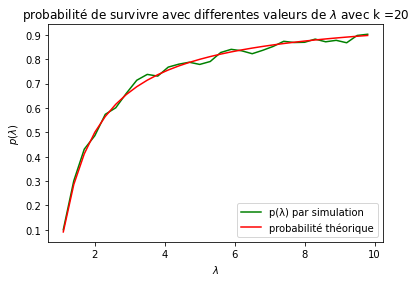

In [ ]:

lam_min = 1.1
lam_max = 10


# on simule N fois
N = 1000
#Si la population est plus grand que k apres n naissance, on admet que les proies survivent toujours
k = 20   #on peut varier k
#erreur = (lam-1)/(lam**(k+1)-1)  # erreur de la probabilite



def proba_de_survivre(lam,k):  #proba qu'il y ait au moins k proies a un moment donne
   
    X = []  #valeur de L_t * 1_(X_tao = k)
    p_1 = lam/(1+lam)
    #p_1_nouvelle = lam_new/(1+lam_new)
    for i in range (N): 
        
        S_0 = np.array([1])
        S = [1]    #valeurs de S_i
        S_n = 1    #valeur de S_n
        while S_n != 0 and S_n != k:
            marche = 2 * (np.random.rand(1)<p_1) - 1
            S_n = S_n + marche[0]
            S.append(S_n)
        if S_n == 0:
            X.append(0)
        else:
            X.append(1)
    X = np.array(X)
    p = np.mean(X)
    return p

array_lambda = np.arange(lam_min,lam_max,0.3)      # array de lambda à differentes valeurs, avec un saut de 0.01
p_lambda = []                       # array de valeur de p(lambda) pour les lambda en array_lambda

p_theorique = 1-1/array_lambda
for lam in array_lambda:                 # ajout des valeurs de p(lambda)
  p_lambda.append(proba_de_survivre(lam,k))

#--------- Tracer le graphe de p(λ)——————
plt.plot(array_lambda,p_lambda,"g",label="p(λ) par simulation")
plt.legend(loc="best")
plt.plot(array_lambda,p_theorique,"r",label="probabilité théorique")
plt.legend(loc="best")


plt.xlabel("$\lambda$")
plt.ylabel("$p(\lambda)$")
plt.title("probabilité de survivre avec differentes valeurs de $\lambda$"+ " avec k =" + str(k))

plt.show()




D'après le graphe ci-dessus, la fonction de $p(\lambda)$ est croissante. Plus $\lambda$ est grand, plus la valeur de $p(\lambda)$ est proche de la probabilité théorique. 

Si on varie la valeur de $k$, on peut aussi voir que quand k est plus grand, on a une courbe qui est plus proche de celle de la probabilité théorique. Cela est parce que si la population a une capacité d'atteindre une valeur plus grande, elle a moins de probabilité de disparaîte. Donc l'erreur de simulation est plus petite.

Par la fonction de la probabilité théorique, qui est $p(\lambda) = 1- \frac{1}{\lambda}$, $p(\lambda)$ est dérivable à droite en 1. 


Si on veut étudier cela, on veut calculer
$$\lim_{\Delta\lambda \to 0} \frac {p(\lambda +\Delta\lambda) - p(\lambda)}{\Delta\lambda}$$ quand $\lambda$ tend vers 1 à droite et voir si cette valeur converge.

On va prendre $\lambda = 0.1,0.01,0.001,0.0001$ et utiliser la méthode de Monte Carlo naive que on a déjà utilisé dans cette question.

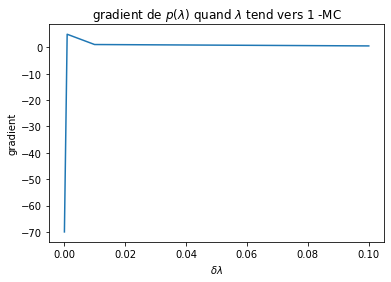

In [ ]:
array_lambda=[0.1,0.01,0.001,0.0001]
pente_lambda = []
lam = 1
k=20
for delta_lambda in array_lambda:
  pente = (proba_de_survivre(delta_lambda+lam,k)-proba_de_survivre(lam,k))/delta_lambda
  pente_lambda.append(pente)

plt.plot(array_lambda,pente_lambda)
plt.xlabel("$\delta \lambda$")
plt.ylabel("gradient")
plt.title("gradient de $p(\lambda)$ quand $\lambda$ tend vers 1 -MC")
plt.show()


On voit que cette méthode ne donne pas de résultat très satisfaisant, puisque quand $\lambda$ tend vers 1, $p(\lambda)$ est très petite, et l'évenement que les proies survivent est un évenement rare.

Pour étudier $p(\lambda)$, où $\lambda $ est proche de 1,on va utiliser la méthode de changement de probabilité. Notons $\tau$ le premier temps où $(S_n:n\geq 0)$ atteint la valeur $k$ ou $0$. Alors on peut utiliser la valeur de $\mathbb{P}(S_\tau = k)$ pour simuler la probabilité que les proies survivent. On a: $$\mathbb{P}(S_\tau = k) \thickapprox \frac {1}{N} \sum_{i=1}^{N} \mathbf{1}_{S^{i}_{\tau}=k} \thickapprox \mathbb{E}[\mathbf{1}_{S_{\tau}=k} ]=\mathbb{E}[L_{\tau} \mathbf{1}_{\widetilde{S}_{\tau}=k}]$$


où $(\widetilde{S}_n : n \geq 0)$ est une nouvelle marche aléatoire avec
$$\mathbb{P}[\widetilde{S}_{n+1} - \widetilde{S}_n = 1] =  \frac {\lambda_{new}}{1+\lambda_{new}}  $$  $$\mathbb{P}[\widetilde{S}_{n+1} - \widetilde{S}_n = -1] =  \frac {1}{1+\lambda_{new}}  $$ et

 $$L_{\tau}= \prod_{i = 1}^{\tau} \frac {p(S_{k-1},S_k)}{p(\widetilde{S}_{k-1},\widetilde{S}_{k})}$$

Enfin, $$p(\lambda) \thickapprox \frac {1}{N} \sum_{i=1}^{N} L_{\tau ^{i}}^{i}\mathbf{1}_{S^{i}_{\tau^{i}}=k}$$

 

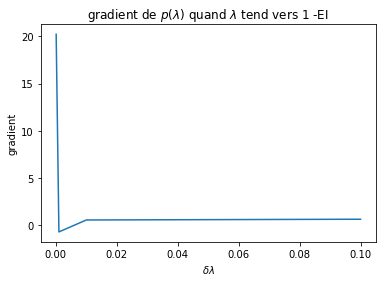

In [ ]:
N = int(1e4)


def L_tao(S,p,p_n):  
    l = len(S)
    L = 1
    for i in range(l-1):
        if (S[i+1]-S[i] == 1):
            L =  L*p/p_n
        else:
            L = L*(1-p)/(1-p_n)
    return L
    
    
    
    
    
    
### pour lambda superieur a 1 et proche de 1
def proba_petitlambda(lam,lam_new,n):  #proba qu'il y ait au moins n proies a un moment donne
   
    X = []  #valeur de L_t * 1_(X_tao = k)
    p_1_initiale = lam/(1+lam)
    p_1_nouvelle = lam_new/(1+lam_new)
    for i in range (N): 
        
        S_0 = np.array([1])
        S = [1]    #valeurs de S_i
        S_n = 1    #valeur de S_n
        while S_n != 0 and S_n != n:
            marche = 2 * (np.random.rand(1)<p_1_nouvelle) - 1
            S_n = S_n + marche[0]
            S.append(S_n)
        if S_n == 0:
            X.append(0)
        else:
            X.append(L_tao(S,p_1_initiale,p_1_nouvelle))
    X = np.array(X)
    p = np.mean(X)
    return p
            
            
            
        
                
 
#print(proba_petitlambda(1.01,3,20))
array_lambda=[0.1,0.01,0.001,0.0001]
pente_lambda = []
lam = 1
k=20
for delta_lambda in array_lambda:
  pente = (proba_petitlambda(delta_lambda+lam,lam_new,k)-proba_petitlambda(lam,lam_new,k))/delta_lambda
  pente_lambda.append(pente)

plt.plot(array_lambda,pente_lambda)
plt.xlabel("$\delta \lambda$")
plt.ylabel("gradient")
plt.title("gradient de $p(\lambda)$ quand $\lambda$ tend vers 1 -EI")
plt.show()    



### Question 4         
Notons $A_n(\lambda)$ la probabilité qu'il y ait au moins $n$ proies à un moment donné. Lorsque $\lambda < 1$, estimer $A_n(\lambda)$ pour quelques valeurs de $n$ et de $\lambda$ dans le régime des événements rares. On pourra en particulier prendre $(\lambda, n) = (0.95, 100), (\lambda, n) = (0.6, 40), (\lambda, n) = (0.5, 10)$ et $(\lambda, n) = (0.2, 7)$.

#### Simulation de $A_n(\lambda)$

Dans cette question, on va simuler $A_n(\lambda)$ qui est la probabilité qu'il y ait au moins $n$ proies à un moment donné.

Pour cela, on choisit de simuler la population en utilisant la méthode dans la question 3, qui est pour simuler la probabilité que les proies survivent. Comme la question 3, soit $S_n$ le nombre de proies après $n$ naissances. On a déjà montré que ($S_n: n \geq 0$) est une marche aléatoire, et on a déjà 
$$\mathbb{P}[S_{n+1} - S_n = 1] =  \frac {\lambda}{1+\lambda}  $$

et, $$\mathbb{P}[S_{n+1} - S_n = -1] =  \frac {1}{1+\lambda}  $$

 On simule $N = 10^4$ fois.

In [ ]:
N = int(1e4) # On simule N fois pour la valeur de A


def proba_n(lam,n):  #proba qu'il y ait au moins n proies a un moment donne
   
    X = []  #valeur de L_t * 1_(X_tao = k)
    p_1 = lam/(1+lam)
    #p_1_nouvelle = lam_new/(1+lam_new)
    for i in range (N): 
        
        S_0 = np.array([1])
        S = [1]    #valeurs de S_i
        S_n = 1    #valeur de S_n
        while S_n != 0 and S_n != n:
            marche = 2 * (np.random.rand(1)<p_1) - 1
            S_n = S_n + marche[0]
            S.append(S_n)
        if S_n == 0:
            X.append(0)
        else:
            X.append(1)
    X = np.array(X)
    p = np.mean(X)
    v = np.std(X)**2
    return p,v

n_array = [7,10,40,100]
lambda_array = [0.2,0.5,0.6,0.95]


for i in range(4):
  n = n_array[i]
  lam = lambda_array[i]
  p, v = proba_n(lam,n)
  ic = 1.96 * v/np.sqrt(N)
  print("n = " + str(n) + " et λ = " + str(lam))
  print("la valeur de A_n(λ) est " + str(p) +" et la variance est" + str(v))
  print("Interval de confiance:"+ "[" + str(p-ic) + "," + str(p+ic)+"]"+"\n")



n = 7 et λ = 0.2
la valeur de A_n(λ) est 0.0 et la variance est0.0
Interval de confiance:[0.0,0.0]

n = 10 et λ = 0.5
la valeur de A_n(λ) est 0.0011 et la variance est0.00109879
Interval de confiance:[0.0010784637160000002,0.001121536284]

n = 40 et λ = 0.6
la valeur de A_n(λ) est 0.0 et la variance est0.0
Interval de confiance:[0.0,0.0]

n = 100 et λ = 0.95
la valeur de A_n(λ) est 0.0006 et la variance est0.00059964
Interval de confiance:[0.000588247056,0.0006117529439999999]



On voit que avec $N$ qui est $10^4$, les résultats de la méthode de Monte Carlo naïve ne sont pas satisfaisants. La valeur de $A_n(\lambda)$ est souvent 0. C'est parce que la capacité de la méthode de Monte Carlo naïve n'est pas suffisante pour simuler les évenements rares, puisque les résultats sont limités par le nombre de simulations et on ne peut pas obtenir une valeur assez précise. Mais on ne pourrais pas augmenter $N$ car la simulation prendrait beaucoup plus de temps.


Pour mieux simuler, on va utiliser la méthode d'échantillonage d'importance en prenant la nouvelle chaîne de Markov dont $\lambda_{new}=1.2$.

In [ ]:
#question 4    importance sampling
import numpy as np
import matplotlib.pyplot as plt

N = int(1e4)
lam_new = 1.2

def L_tao(S,p,p_n):  
    l = len(S)
    L = 1
    for i in range(l-1):
        if (S[i+1]-S[i] == 1):
            L =  L*p/p_n
        else:
            L = L*(1-p)/(1-p_n)
    return L
    
    
    
    
    
    
### pour lambda superieur a 1 et proche de 1
def proba_petitlambda(lam,lam_new,n):  #proba qu'il y ait au moins n proies a un moment donne
   
    X = []  #valeur de L_t * 1_(X_tao = k)
    p_1_initiale = lam/(1+lam)
    p_1_nouvelle = lam_new/(1+lam_new)
    for i in range (N): 
        
        S_0 = np.array([1])
        S = [1]    #valeurs de S_i
        S_n = 1    #valeur de S_n
        while S_n != 0 and S_n != n:
            marche = 2 * (np.random.rand(1)<p_1_nouvelle) - 1
            S_n = S_n + marche[0]
            S.append(S_n)
        if S_n == 0:
            X.append(0)
        else:
            X.append(L_tao(S,p_1_initiale,p_1_nouvelle))
    X = np.array(X)
    p = np.mean(X)
    variance = np.std(X)**2
    return p,variance
            
n_array = [7,10,40,100]
lambda_array = [0.2,0.5,0.6,0.95]


for i in range(4):
  n = n_array[i]
  lam = lambda_array[i]
  p, v = proba_petitlambda(lam,2,n)
  ic = 1.96 * v/np.sqrt(N)
  print("n = " + str(n) + " et λ = " + str(lam))
  print("la proba de A_n(λ) " + str(p) +" et la variance est " + str(v))
  print("Interval de confiance:"+ "[" + str(p-ic) + "," + str(p+ic)+"]"+"\n")
           
            
        
                      


n = 7 et λ = 0.2
la proba de A_n(λ) 5.164605435613446e-05 et la variance est 5.9933499829254315e-09
Interval de confiance:[5.16459368864748e-05,5.1646171825794126e-05]

n = 10 et λ = 0.5
la proba de A_n(λ) 0.00098046875 et la variance est 9.536590576171872e-07
Interval de confiance:[0.0009804500582824708,0.0009804874417175292]

n = 40 et λ = 0.6
la proba de A_n(λ) 8.548895010470581e-10 et la variance est 3.7720914698592176e-18
Interval de confiance:[8.548895009731251e-10,8.548895011209911e-10]

n = 100 et λ = 0.95
la proba de A_n(λ) 2.8616462458620647e-07 et la variance est 2.5510571057901855e-10
Interval de confiance:[2.861596245142791e-07,2.8616962465813384e-07]



En utilisant l'échantillonage d'importance, avec un même $N$ qui est $10^4$,  les résultats sont beaucoup plus mieux.

### Question 5
Que se passe-t-il pour $\tilde{A_n(\lambda)}$, défini comme étant la probabilité qu'une proie atteigne le site $n$ ?

Dans cette question, au pire des cas, le nombre de prédateurs et de proies augmente alternativement, c'est-à-dire que dans ce cas, le nombre de marche qui vaut 1 est au moins $n-1$ parmi les premiers $2n$ marches, et quand le proie atteint le site n, la population de proie n'a jamais atteint $0$.

Donc on a un algorithme qui compte le nombre de marche qui vaut 1 et qui verifie si la population touche 0 avant que la proie atteigne le site n. C'est une méthode de Monte Carlo naïf.

In [ ]:
#question 5   2n pas, 
import numpy as np
N = int(1e4)
def reach_site_n(n,lam):
    p = lam/(1+lam)       # proba de l'augmentation de la population de 1
    S_0 = 1
    X = []   # stocker les valeurs de 1{une proie atteint le site n}
    for i in range(N):
        tirages = 2 * (np.random.rand(2*n)<p) - 1   # Tire 2n Bernoulli +1/-1   avec proba p
        S = 1 + np.cumsum(tirages)
        pas_1 = 0     #nombre de "1" dans les 2n marche
        indice = 0    #la position de la proie plus a droite
        while pas_1<n-1 and indice<2*n:   # si le nombre de marche qui vaut 1 est inferieur a n-1 et la proie n'a pas encore atteint le site n
            if tirages[indice] == 1:
                pas_1 = pas_1 + 1
            indice = indice + 1
        if(pas_1 == n-1):           
            for j in range(indice):
                if S[j] == 0:    # si la population a deja atteint 0 avant que la proie atteigne le site n, on dit que la proie n'a pas reussit 
                    X.append(0)
                    break
            X.append(1)
        else:           # si le nombre de 1 est inferieur a n-1, on dit que la proie n'a pas reussit non plus
            X.append(0)
    X = np.array(X)
    p = np.mean(X)
    v = np.std(X)**2
    return p,v

n_array = [7,10,40,100]
lambda_array = [0.2,0.5,0.6,0.95]


for i in range(4):
  n = n_array[i]
  lam = lambda_array[i]
  p, v = reach_site_n(n,lam)
  ic = 1.96 * v/np.sqrt(N)
  print("n = " + str(n) + " et λ = " + str(lam))
  print("la proba qu'une proie atteigne le site n est " + str(p) +" et la variance est" + str(v))
  print("Interval de confiance:"+ "[" + str(p-ic) + "," + str(p+ic)+"]"+"\n")




       

n = 7 et λ = 0.2
la proba qu'une proie atteigne le site n est 0.020992740827938002 et la variance est0.020552045660469035
Interval de confiance:[0.02058992073299281,0.021395560922883194]

n = 10 et λ = 0.5
la proba qu'une proie atteigne le site n est 0.16489406959925126 et la variance est0.13770401541024854
Interval de confiance:[0.16219507089721039,0.16759306830129214]

n = 40 et λ = 0.6
la proba qu'une proie atteigne le site n est 0.026700448255700643 et la variance est0.025987534318645294
Interval de confiance:[0.026191092583055194,0.027209803928346092]

n = 100 et λ = 0.95
la proba qu'une proie atteigne le site n est 0.3182976915451069 et la variance est0.21698427110216292
Interval de confiance:[0.3140447998315045,0.3225505832587093]



### Question 6
{Lorsque $\lambda < 1$, on peut démontrer que $A_n(\lambda) ~ a(\lambda) \cdot b(\lambda)^n$ lorsque $n\rightarrow \infty$ pour certaines valeurs $a(\lambda), b(\lambda) > 0$. Tracer numériquement les graphes des fonctions $a$ et $b$. Que se passe-t-il pour $\lambda = 1$ ?

Dans cette question, si on peut démontrer que $A_n(\lambda) \sim a(\lambda)·b(\lambda)^n$, on aura $$logA_n(\lambda) \sim log b(\lambda)·n + loga(\lambda)$$
Donc si on trace le graphe de $logA_n(\lambda)$ en fonction de $n$ pour $\lambda$ fixé, on va avoir une ligne droite. 

D'abord on trace la graphe de $logA_n(\lambda)$ en fonction de $n$ pour différentes valeurs de $\lambda$. On va aussi utiliser l'échantillonage d'importance pour simuler les valeurs de $logA_n(\lambda)$ en prenant la nouvelle chaîne de Markov dont $\lambda_{new}=1.2$. On reprend les valeurs de $\lambda$ et $n$ de la question 4. On simule $N=10^3$ fois pour avoir chaque $A_n(\lambda)$.

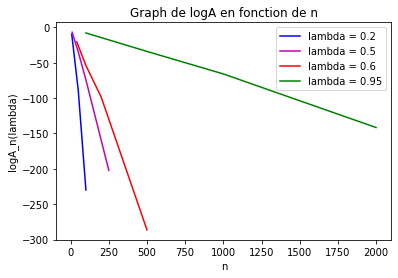

In [ ]:
#question 6
import matplotlib.pyplot as plt
N = int(1e3)

lam = 0.2
lam_new = 1.2
n_array_1 = [7,10,50,100]
n_array_1 = np.array(n_array_1)

#for n in n_array:
    #print(proba_petitlambda(lam,lam_new,n))
A_n_lambda_1 = [proba_petitlambda(lam,lam_new,n) for n in n_array_1]
A_n_lambda_1 = np.array(A_n_lambda_1)
log_A_1 = np.log(A_n_lambda_1)
plt.plot(n_array_1,log_A_1,"b", label="lambda = 0.2")
plt.legend(loc="best")


lam = 0.5
lam_new = 1.2
n_array_2 = [10,50,100,250]
n_array_2 = np.array(n_array_2)

#for n in n_array:
    #print(proba_petitlambda(lam,lam_new,n))
A_n_lambda_2 = [proba_petitlambda(lam,lam_new,n) for n in n_array_2]
A_n_lambda_2 = np.array(A_n_lambda_2)
log_A_2 = np.log(A_n_lambda_2)
plt.plot(n_array_2,log_A_2,"m", label="lambda = 0.5")
plt.legend(loc="best")


lam = 0.6
lam_new = 1.2
n_array_3 = [40,100,200,500]
n_array_3 = np.array(n_array_3)

#for n in n_array:
    #print(proba_petitlambda(lam,lam_new,n))
A_n_lambda_3 = [proba_petitlambda(lam,lam_new,n) for n in n_array_3]
A_n_lambda_3 = np.array(A_n_lambda_3)
log_A_3 = np.log(A_n_lambda_3)
plt.plot(n_array_3,log_A_3,"r", label="lambda = 0.6")
plt.legend(loc="best")


lam = 0.95
lam_new = 1.2
n_array_4 = [100,500,1000,2000]
n_array_4 = np.array(n_array_4)

#for n in n_array:
    #print(proba_petitlambda(lam,lam_new,n))
A_n_lambda_4 = [proba_petitlambda(lam,lam_new,n) for n in n_array_4]
A_n_lambda_4 = np.array(A_n_lambda_4)
log_A_4 = np.log(A_n_lambda_4)
plt.plot(n_array_4,log_A_4,"g",label = "lambda = 0.95")
plt.legend(loc="best")

plt.xlabel("n")
plt.ylabel("logA_n(lambda)")
plt.title("Graph de logA en fonction de n")
plt.show()

On a bien des lignes droites, ce qui prouve que $A_n(\lambda) \sim a(\lambda)·b(\lambda)^n$ quand $n \to \infty$. On voit aussi que la pente diminue quand $\lambda$ augmente.

Pour calculer les valeurs de a et b, on va utiliser la méthode des moindres carrés. La fonction ci-dessous prend une list x et une list y et elle renvoie la pente et l'ordonnée à l'origine de la ligne ajustée. Il faut juste faire $exp()$ car la pente et l'ordonnée à l'origine sont en effet les logarithmes de $b(\lambda)$ et $a(\lambda)$.

In [ ]:
#Méthode des moindres carrés
#input:un array de x et un array de y
#output: la pente et l'ordonnée à l'origine
def fit(data_x, data_y):   
    m = len(data_y)
    x_bar = np.mean(data_x)
    sum_yx = 0
    sum_x2 = 0
    sum_delta = 0
    for i in range(m):
        x = data_x[i]
        y = data_y[i]
        sum_yx += y * (x - x_bar)
        sum_x2 += x ** 2
    
    w = sum_yx / (sum_x2 - m * (x_bar ** 2))   #w est la pente

    for i in range(m):
        x = data_x[i]
        y = data_y[i]
        sum_delta += (y - w * x)
    b = sum_delta / m                 # b est l'ordonnée à l'origine
    return w, b

Ensuite on trace les graphes des fonctions a et b.

In [ ]:
a = []  #array pour stocker les valeur de a
b = []  #array pour stocker les valeur de b
lam_array = [0.2,0.5,0.6,0.95]   #valeurs de lambda que on va utiliser 

w_1,b_1 = fit(n_array_1,log_A_1)  #calcule la pente et l'ordonnée à l'origine
a.append(np.exp(b_1))
b.append(np.exp(w_1))         # les stocker dans les array
w_2,b_2 = fit(n_array_2,log_A_2)
a.append(np.exp(b_2))
b.append(np.exp(w_2))
w_3,b_3 = fit(n_array_3,log_A_3)
a.append(np.exp(b_3))
b.append(np.exp(w_3))
w_4,b_4 = fit(n_array_4,log_A_4)
a.append(np.exp(b_4))
b.append(np.exp(w_4))

#figure de a
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(lam_array,a)
plt.scatter(lam_array,a)
plt.xlabel("λ")
plt.ylabel("a(λ)")
plt.title("a(λ) en fonction de λ")

#figure de b
plt.subplot(1, 2, 2)
plt.plot(lam_array,b)
plt.scatter(lam_array,b)
plt.xlabel("λ")
plt.ylabel("b(λ)")
plt.title("b(λ) en fonction de λ")

plt.show()

NameError: ignored

D'après les graphes ci-dessus, on voit que $a(\lambda)$ est une fonction décroissante et $b(\lambda)$ est une fonction croissante.

Quand $\lambda = 1$, la pente de droite disparaît, c'est-à-dire $b = 1$, ce qui peut se voir dans le graphe de $b(\lambda)$, où la valeur approche 1.
On voit aussi que $a$ tend vers 0 dans ce cas. Tout ceci montre que $A_n(1)$ ne dépend pas de $n$ et il vaut $0$.

 

### Question 7
Reprendre la deuxième partie en travaillant maintenant sur $\mathbb{Z}^2$, avec à l'instant $t = 0$ une proie et un prédateur côte à côte, et tous les autres sites vides.

#### Simulation de processus

Cette partie est une simulation codée du processus de survie entre la proie et le prédateur. Comme dans la deuxième partie, les naissances des proies et des prédateurs obéissent à des processus de Poisson. Pour la proie, elle ne peut choisir qu'une position dans quatre directions, à savoir le haut, le bas, la gauche et la droite, et doit s'assurer que cette position est vide. De même, le prédateur ne peut choisir que quatre endroits proches et doit s'assurer que cet endroit est une proie. En fait, les propriétés en deux dimensions ne diffèrent pas beaucoup de celles en une dimension, sauf qu'elles sont plus longues à calculer.

Pour chaque processus de naissance, tant pour le prédateur que pour la proie, sans considérer du temps, on peut considérer que chaque naissance est distribuée selon la loi de Bernoulli, sauf que la probabilité change à chaque fois. La probabilité ici, comme dans la deuxième partie, pour la probabilité que la naissance suivante soit une proie, est le nombre de positions de toutes les proies potentielles multiplié par le coefficient $\lambda$ du processus de Poisson plus le nombre de positions de tous les prédateurs potentiels multiplié par le coefficient 1 du processus de Poisson.

Pour le temps de processus, on peut utiliser la méthode A de la boîte à outils: Par la propriété d'absence de mémoire de la loi exponentielle, le minimum de variables aléatoires exponentielles indépendantes de paramètres respectifs $\lambda_1,\lambda_2,...,\lambda_n$ est une variable aléatoire exponentielle dont le paramètre est $\lambda_1+\lambda_2+...+\lambda_n$. Ici, pour chaque naissance, l'intervalle de temps est la plus petite de toutes les variables aléatoires exponentielle. Ainsi, par cette propriété, il s'agit d'une distribution exponentielle satisfaisant le paramètre: $\lambda*Card($proies potentielles)$+1*Card($prédateurs potentielles$)$.

Sur la base de ces propriétés, on va définir les positions initiales du prédateur et de la proie à simuler à l'aide de l'algorithme ci-dessus. Après 1000 naissances, on dessine les positions du prédateur et de la proie sur le graphique.

In [ ]:
#Initialisation
# Les positions de proie et prédateur
Wolf = [(0,0)]
Sheep = [(1,0)]
# Les positions possibles de proie et prédateur
Wolfprob = []
Sheepprob = []
# paramètre 
lam = 1.2
N = 1000
# le temps
T_sum = 0

for i in range(N):
    # Trouver les positions possibles pour les proies
    for sheep in Sheep:
        if (sheep[0]+1,sheep[1]) not in Sheep and (sheep[0]+1,sheep[1]) not in Wolf and (sheep[0]+1,sheep[1]) not in Sheepprob:
            Sheepprob.append((sheep[0]+1,sheep[1]))
        if (sheep[0]-1,sheep[1]) not in Sheep and (sheep[0]-1,sheep[1]) not in Wolf and (sheep[0]-1,sheep[1]) not in Sheepprob:
            Sheepprob.append((sheep[0]-1,sheep[1]))
        if (sheep[0],sheep[1]+1) not in Sheep and (sheep[0],sheep[1]+1) not in Wolf and (sheep[0],sheep[1]+1) not in Sheepprob:
            Sheepprob.append((sheep[0],sheep[1]+1))
        if (sheep[0],sheep[1]-1) not in Sheep and (sheep[0],sheep[1]-1) not in Wolf and (sheep[0],sheep[1]-1) not in Sheepprob:
            Sheepprob.append((sheep[0],sheep[1]-1))  
    # Trouver les positions possibles pour les prédateurs
    for wolf in Wolf:
        if (wolf[0]+1,wolf[1]) in Sheep and (wolf[0]+1,wolf[1]) not in Wolfprob:
            Wolfprob.append((wolf[0]+1,wolf[1]))
        if (wolf[0]-1,wolf[1]) in Sheep and (wolf[0]-1,wolf[1]) not in Wolfprob:
            Wolfprob.append((wolf[0]-1,wolf[1]))    
        if (wolf[0],wolf[1]+1) in Sheep and (wolf[0],wolf[1]+1) not in Wolfprob:
            Wolfprob.append((wolf[0],wolf[1]+1))
        if (wolf[0],wolf[1]-1) in Sheep and (wolf[0],wolf[1]-1) not in Wolfprob:
            Wolfprob.append((wolf[0],wolf[1]-1))
    # la probabilité de naissance
    p = lam*len(Sheepprob)/(lam*len(Sheepprob)+1*len(Wolfprob))
    # Générer un nombre aléatoire entre 0 et 1
    m = np.random.random()
    
    # La naissance de proie 
    if m<p:
      sheepnew = Sheepprob[int(np.random.randint(len(Sheepprob),size=1))]
      Sheepprob.remove(sheepnew)
      Sheep.append(sheepnew)
    # La naissance de prédécesseur
    else:
        wolfnew = Wolfprob[int(np.random.randint(len(Wolfprob),size=1))]
        Wolfprob.remove(wolfnew)
        for sheep in Sheep:
          if sheep == wolfnew:
            Sheep.remove(sheep)
        Wolf.append(wolfnew)

    # utiliser le minimum de variables aléatoires exponentielle indépendantes pour calculer le temps 
    t = np.random.exponential(scale=1/(lam*len(Sheepprob)+1*len(Wolfprob)))
    T_sum = T_sum +t


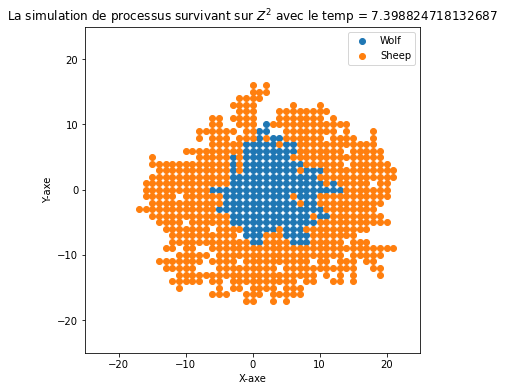

In [ ]:
# Dessiner la photo directement
m = 25 #paramètre
plt.figure(figsize=(6,6))
plt.xlim(-m,m)
plt.xlabel('X-axe')
plt.ylim(-m,m)
plt.ylabel('Y-axe')
plt.scatter([w[0] for w in Wolf],[w[1] for w in Wolf],label = 'Wolf')
plt.scatter([w[0] for w in Sheep],[w[1] for w in Sheep],label = 'Sheep')
plt.title("La simulation de processus survivant sur $Z^2$ avec le temp = "+str(T_sum), fontsize=12)
plt.legend()
plt.show()

Selon les exigences du sujet, nous pouvons également convertir les résultats sous forme de matrice et dessiner une carte thermique en utilisant le formulaire Dataframe, comme dans la Figure 3 du sujet. On voie que les sites blanc sont les prédateurs et les sites rouge sont les proies.

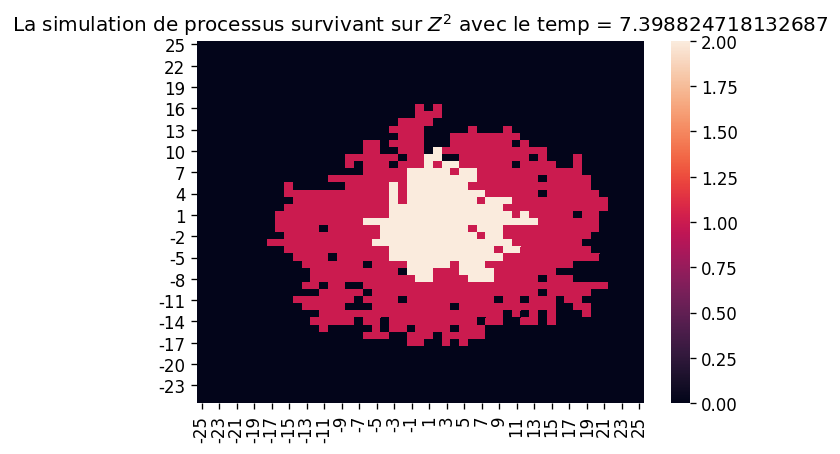

In [ ]:
# Dessiner la photo par heatmap 
m = 25
Blank = []
# Trouver le position vide après les naissances
for i in range(2*m+1):
    for j in range(2*m+1):
        if (i-m,j-m) not in Sheep and (i-m,j-m) not in Wolf:
            Blank.append((i-m,j-m))
# Créer une matrice 
Matrix = []
for j in range(2*m+1):
    tmp = []
    for i in range(2*m+1):
      if (-m+i,m-j) in Sheep:
          tmp.append(1)
      elif (-m+i,m-j) in Wolf:
          tmp.append(2)
      else:
          tmp.append(0)
    Matrix.append(tmp)

# Transformer le matrice à la Dataframe
df = pd.DataFrame(Matrix)
df.columns = [i for i in range(-m,m+1)]
df.index = [-i for i in range(-m,m+1)]

# Dessiner le heatmap
plt.figure(dpi=120)
sns.heatmap(data=df)     
plt.title("La simulation de processus survivant sur $Z^2$ avec le temp = "+str(T_sum), fontsize=12)     
plt.show()

#### La propriété de distance et de temps
Dans l'espace bidimensionnel, la plupart des cas sont similaires à ceux de l'axe unidimensionnel, sauf que la possibilité de position est ajoutée et que la variable "distance" est introduite. Par conséquent, on étudie ci-dessous la relation entre la distance et le temps pour la proie la plus éloignée de l'origine dans un groupe de proies.

In [ ]:
#Initialisation
# paramètre 
lam = 1.2
N = 1000
# les temps et les distances
T = []
Maxdistancesheep = []
Maxdistancewolf = []

for itry in range(10):
    # Les positions de proie et prédateur
    Wolf = [(0,0)]
    Sheep = [(1,0)]
    # Les positions possibles de proie et prédateur
    Wolfprob = []
    Sheepprob = []
    # les temps et les distances
    T_sum = 0
    distancesheep = 0
    distancewolf = 0
    Ttmp = []
    Maxdistancetmpsheep = []
    Maxdistancetmpwolf = []
    
    for i in range(N):
        # Trouver les positions possibles pour les proies
        for sheep in Sheep:
            if (sheep[0]+1,sheep[1]) not in Sheep and (sheep[0]+1,sheep[1]) not in Wolf and (sheep[0]+1,sheep[1]) not in Sheepprob:
                Sheepprob.append((sheep[0]+1,sheep[1]))
            if (sheep[0]-1,sheep[1]) not in Sheep and (sheep[0]-1,sheep[1]) not in Wolf and (sheep[0]-1,sheep[1]) not in Sheepprob:
                Sheepprob.append((sheep[0]-1,sheep[1]))
            if (sheep[0],sheep[1]+1) not in Sheep and (sheep[0],sheep[1]+1) not in Wolf and (sheep[0],sheep[1]+1) not in Sheepprob:
                Sheepprob.append((sheep[0],sheep[1]+1))
            if (sheep[0],sheep[1]-1) not in Sheep and (sheep[0],sheep[1]-1) not in Wolf and (sheep[0],sheep[1]-1) not in Sheepprob:
                Sheepprob.append((sheep[0],sheep[1]-1))  
        # Trouver les positions possibles pour les prédateurs
        for wolf in Wolf:
            if (wolf[0]+1,wolf[1]) in Sheep and (wolf[0]+1,wolf[1]) not in Wolfprob:
                Wolfprob.append((wolf[0]+1,wolf[1]))
            if (wolf[0]-1,wolf[1]) in Sheep and (wolf[0]-1,wolf[1]) not in Wolfprob:
                Wolfprob.append((wolf[0]-1,wolf[1]))    
            if (wolf[0],wolf[1]+1) in Sheep and (wolf[0],wolf[1]+1) not in Wolfprob:
                Wolfprob.append((wolf[0],wolf[1]+1))
            if (wolf[0],wolf[1]-1) in Sheep and (wolf[0],wolf[1]-1) not in Wolfprob:
                Wolfprob.append((wolf[0],wolf[1]-1))
        # la probabilité de naissance
        p = lam*len(Sheepprob)/(lam*len(Sheepprob)+1*len(Wolfprob))
        # Générer un nombre aléatoire entre 0 et 1
        m = np.random.random()

        # La naissance de proie 
        if m<p:
            sheepnew = Sheepprob[int(np.random.randint(len(Sheepprob),size=1))]
            Sheepprob.remove(sheepnew)
            Sheep.append(sheepnew)
        # La naissance de prédécesseur
        else:
            wolfnew = Wolfprob[int(np.random.randint(len(Wolfprob),size=1))]
            Wolfprob.remove(wolfnew)
            for sheep in Sheep:
                if sheep == wolfnew:
                    Sheep.remove(sheep)
            Wolf.append(wolfnew)
        # utiliser le minimum de variables aléatoires exponentielle indépendantes pour calculer le temps 
        t = np.random.exponential(scale=1/(lam*len(Sheepprob)+1*len(Wolfprob)))
        T_sum = T_sum +t
        Ttmp.append(T_sum)

        # Marquer la plus loin distance de proie
        for sheep in Sheep:
            dis1 = (sheep[0]**2+sheep[1]**2)**(1/2)
            if dis1 > distancesheep :
                distancesheep = dis1

        Maxdistancetmpsheep.append(distancesheep)

        # Marquer la plus loin distance de prédateur
        for wolf in Wolf:
            dis2 = (wolf[0]**2+wolf[1]**2)**(1/2)
            if dis2 > distancewolf :
                distancewolf = dis2

        Maxdistancetmpwolf.append(distancewolf)

    T.append(Ttmp)
    Maxdistancesheep.append(Maxdistancetmpsheep)
    Maxdistancewolf.append(Maxdistancetmpwolf)

On effectue ici dix simulations dans lesquelles on enregistre la variation du temps et de la distance et traçons les graphiques correspondants.

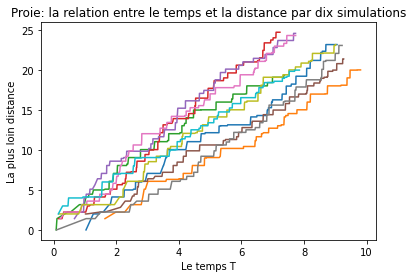

In [ ]:
for i in range(10):
    plt.plot(T[i],Maxdistancesheep[i])
plt.xlabel('Le temps T')
plt.ylabel('La plus loin distance')
plt.title("Proie: la relation entre le temps et la distance par dix simulations", fontsize=12)
plt.show()

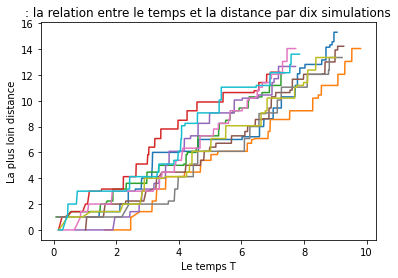

In [ ]:
for i in range(10):
    plt.plot(T[i],Maxdistancewolf[i])
plt.xlabel('Le temps T')
plt.ylabel('La plus loin distance')
plt.title(": la relation entre le temps et la distance par dix simulations", fontsize=12)
plt.show()

En dessinant les images, il est clair que, en général, la distance de la proie la plus éloignée de l'origine dans le groupe de proies est linéairement liée au temps. Dans ces dix simulations également, leurs pentes sont similaires. De même pour les prédateurs, les mêmes propriétés sont présentes.